In [1]:
import pandas as pd;
import numpy as np;
import matplotlib as plt;
import re;
import os;
from tqdm.notebook import tqdm;
from sklearn import preprocessing
from datetime import datetime,timedelta

In [2]:
#dirpath,dirnames,filenames=os.walk(r"D:\OneDrive\学习\Program\结肠癌分类器\experiment_1\All data")
selected_table=os.listdir(r"D:\OneDrive\学习\Program\结肠癌分类器\Complete_Data")
for i in range(len(selected_table)):
    selected_table[i]=os.path.join("D:\OneDrive\学习\Program\结肠癌分类器\Complete_Data",selected_table[i])

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'D:\\OneDrive\\学习\\Program\\结肠癌分类器\\Complete_Data'

In [2]:
chosen_list=["血_钾","血_钠","血_氯","血_葡萄糖","血_肌酐","血_尿素","尿_比重","尿_酸碱度","尿_白细胞","尿_亚硝酸盐","尿_蛋白质","尿_葡萄糖"
             ,"尿_酮体","尿_尿胆原","尿_胆红素","尿_红细胞血红蛋白","血_癌胚抗原","血_糖类抗原CA199","血_总胆红素","血_直接胆红素",
             "血_间接胆红素","血_总蛋白","血_白蛋白","血_球蛋白","血_白蛋白/球蛋白","血_丙氨酸氨基转移酶","血_门冬氨酸氨基转移酶",
             "血_碱性磷酸酶","血_总胆汁酸","血_γ-谷氨酰转肽酶","血_前白蛋白","血_乳酸脱氢酶","血_二氧化碳结合力","血_尿酸",
             "血_白细胞计数","血_淋巴细胞计数","血_单核细胞计数","血_中性粒细胞计数","血_嗜酸粒细胞计数","血_嗜碱粒细胞计数","血_淋巴细胞",
             "血_单核细胞","血_嗜酸粒细胞","血_嗜碱粒细胞","血_中性粒细胞","血_红细胞计数","血_血红蛋白","血_红细胞比积","血_平均红细胞体积",
             "血_平均红细胞血红蛋白含量","血_平均红细胞血红蛋白浓度","血_红细胞分布宽度","血_血小板计数","血_平均血小板体积","血_血小板压积",
             "血_血小板分布宽度","血_大血小板细胞比率","粪_粪粘度","粪_粪血液","粪_粪不消化食物","粪_粪红细胞","粪_粪白细胞","粪_粪巨噬细胞",
             "粪_粪硬度","粪_粪颜色","粪_粪隐血","粪_粪转铁蛋白"]
binary_list=["尿_白细胞","尿_亚硝酸盐","尿_蛋白质","尿_酮体","尿_尿胆原","尿_胆红素","尿_红细胞血红蛋白","粪_粪隐血","粪_粪不消化食物",
             "粪_粪巨噬细胞","粪_粪白细胞","粪_粪硬度","粪_粪粘度","粪_粪红细胞","粪_粪血液","粪_粪转铁蛋白","粪_粪颜色"]

In [5]:
len(chosen_list),len(binary_list)

(67, 17)

In [35]:
out_path= r'D:\OneDrive\学习\Program\结肠癌分类器\re_indentify\CAdroping_merged.xlsx'
identify_data=pd.read_excel(r'D:\OneDrive\学习\Program\结肠癌分类器\re_indentify\re_data.xlsx')
birth_data=pd.read_excel(r'D:\OneDrive\学习\Program\结肠癌分类器\DATA\肠镜患者基本信息 补充_脱敏.xls',sheet_name=[0,1,2])
birth_data_all=pd.DataFrame()
for i in range(3):
    birth_data_all=pd.concat([birth_data_all,birth_data[i]],ignore_index=True)
birth_data=birth_data_all

combined_data=pd.DataFrame()
All_ID=[];
ID_checktime=[];
ID_birthtime=[];
#在3b中挑选的指指标
chosen_list=["血_钾","血_钠","血_氯","血_葡萄糖","血_肌酐","血_尿素","尿_比重","尿_酸碱度","尿_白细胞","尿_亚硝酸盐","尿_蛋白质","尿_葡萄糖"
             ,"尿_酮体","尿_尿胆原","尿_胆红素","尿_红细胞血红蛋白","血_癌胚抗原","血_糖类抗原CA199","血_总胆红素","血_直接胆红素",
             "血_间接胆红素","血_总蛋白","血_白蛋白","血_球蛋白","血_白蛋白/球蛋白","血_丙氨酸氨基转移酶","血_门冬氨酸氨基转移酶",
             "血_碱性磷酸酶","血_总胆汁酸","血_γ-谷氨酰转肽酶","血_前白蛋白","血_乳酸脱氢酶","血_二氧化碳结合力","血_尿酸",
             "血_白细胞计数","血_淋巴细胞计数","血_单核细胞计数","血_中性粒细胞计数","血_嗜酸粒细胞计数","血_嗜碱粒细胞计数","血_淋巴细胞",
             "血_单核细胞","血_嗜酸粒细胞","血_嗜碱粒细胞","血_中性粒细胞","血_红细胞计数","血_血红蛋白","血_红细胞比积","血_平均红细胞体积",
             "血_平均红细胞血红蛋白含量","血_平均红细胞血红蛋白浓度","血_红细胞分布宽度","血_血小板计数","血_平均血小板体积","血_血小板压积",
             "血_血小板分布宽度","血_大血小板细胞比率","粪_粪粘度","粪_粪血液","粪_粪不消化食物","粪_粪红细胞","粪_粪白细胞","粪_粪巨噬细胞",
             "粪_粪硬度","粪_粪颜色","粪_粪隐血","粪_粪转铁蛋白"]
binary_list=["尿_白细胞","尿_亚硝酸盐","尿_蛋白质","尿_酮体","尿_尿胆原","尿_胆红素","尿_红细胞血红蛋白","粪_粪隐血","粪_粪不消化食物",
             "粪_粪巨噬细胞","粪_粪白细胞","粪_粪硬度","粪_粪粘度","粪_粪红细胞","粪_粪血液","粪_粪转铁蛋白","粪_粪颜色"]


#ini
check_list=[];
std_data=pd.DataFrame(columns=["PATIENT_ID"])
std_data["年龄"]="";
j=-1;

for in_path in tqdm(selected_table):
#for in_path in ['D:\\OneDrive\\学习\\Program\\结肠癌分类器\\experiment_1\\All data\\3b.csv']:
    #print(in_path)
    data = pd.read_csv(in_path,engine='python');


    #将data变成panel data  
    for i in tqdm(data.index):  
        try:
            current_item=str(data["SPECIMEN"].values[i])+"_"+data["REPORT_ITEM_NAME"].values[i];
        except:
            current_item="NA"
            
        #find the test time
        try:
            t=re.findall(r'\d+',data["RESULT_DATE_TIME"].values[i]);
            if len(t)==6:
                test_time=datetime(int(t[0]),int(t[1]),int(t[2]),int(t[3]),int(t[4]),int(t[5]))
            else:
                test_time="NA";
        except:
            test_time="NA";
        
        if data["PATIENT_ID"].loc[i] in All_ID: #判断是否为新患者
            current_index=All_ID.index(data["PATIENT_ID"].loc[i])
        else:
            #加入新的ID
            All_ID.append(data["PATIENT_ID"].loc[i]);
            #寻找该ID的诊断时间
            try:
                CA_result=identify_data[identify_data["PID"].isin([data["PATIENT_ID"].loc[i]])]
                CA_result=CA_result.reset_index()
                dig_time=re.findall(r'\d+',CA_result["病理时间"].loc[0])
                if len(dig_time)==6:
                    dig_time=datetime(int(dig_time[0]),int(dig_time[1]),int(dig_time[2]),int(dig_time[3]),int(dig_time[4]),int(dig_time[5]))
                    ID_checktime.append(dig_time)
                else:
                    ID_checktime.append("NA")
            except:
                ID_checktime.append("NA")
                
            #寻找该ID的出生年月日
            try:
                birth=birth_data[birth_data["ID号"].isin([data["PATIENT_ID"].loc[i]])]
                birth=birth.reset_index()
                birth=re.findall(r'\d+',birth["出生日期"].loc[0])
                if len(birth)==3:
                    birth=datetime(int(birth[0]),int(birth[1]),int(birth[2]))
                    ID_birthtime.append(birth)
                else:
                    ID_birthtime.append("NA")
            except:
                ID_birthtime.append("NA")
            
            j+=1;
            std_data.loc[j]=""; #插入空行适应新患者
            std_data["PATIENT_ID"].loc[j]=data["PATIENT_ID"].values[i];
            current_index=j;
        
        #计算测试时间和诊断时间的时间差，以天为准
        if ID_checktime[current_index]=="NA" or test_time=="NA":
            durations=3600;#dummy durations,只要保证在后面通不过时间差检测即可
        else:
            durations=ID_checktime[current_index]-test_time
            durations=abs(durations.days)

        if current_item in check_list:
            if current_item in chosen_list:
                if durations<180:
                    std_data[current_item].loc[current_index]=data["RESULT"].values[i]; 
        else:
            check_list.append(current_item);
            if current_item in chosen_list:
                std_data[current_item]="";
                if durations<180:
                    std_data[current_item].loc[current_index]=data["RESULT"].values[i];
        #计算年龄
        if ID_checktime[current_index]=="NA" or ID_birthtime[current_index]=="NA":
            std_data["年龄"].loc[current_index]="NA"
        else:
            std_data["年龄"].loc[current_index]=ID_checktime[current_index].year-ID_birthtime[current_index].year
            
            

std_data=std_data.reset_index(drop=True)

In [36]:
#std_data.to_excel(r"D:\OneDrive\学习\Program\结肠癌分类器\Final\std_data.xlsx")
chosen_data=std_data.copy()

In [37]:
#加入病人外观以及入院诊断,drop掉找不到y标签的病人
fea_data=pd.read_excel(r'D:\OneDrive\学习\Program\结肠癌分类器\DATA\2013年至今住院肠镜患者脱敏.xlsx')

chosen_data["性别"]=""
chosen_data["体重"]=""
chosen_data["身高"]=""
chosen_data["癌"]=""
chosen_data["癌前病变"]=""
chosen_data["良性疾病"]=""
chosen_data["健康或非结肠疾病"]=""

#出院诊断的代码
status_0=["Z00.001"]
status_1=["K62.101","K63.501"," K63.802","K63.805"]
status_2=["M82100","M82110","M82200","D36.901"," M82210/0","M81400","M82610","D12.602"," M82201/0","K51.401","M82630"
              ,"K51.251","K51.901","K51.902","K52.915"," K50.102"," K50.104","K50.901","K50.101"]
status_3=["C18.000","C18.001","C18.100","C18.200","C18.300","C18.400","C18.500","C18.600","C18.700",
              "C18.800","C18.801","C18.802","C18.803","C18.900","C18.901","C19  00","C19  01","C20  00","C20  01","C21.000"
              "C21.100","C21.101","C21.200","C21.800","C21.801"]


for i in tqdm(chosen_data.index):
    try:
        feature=fea_data[fea_data["ID号"].isin([chosen_data["PATIENT_ID"].loc[i]])]#寻找同ID的入院记录
        feature=feature.reset_index()
        #数据化性别
        feature.replace("女",0,inplace=True)
        feature.replace("男",1,inplace=True)
        #由于可以入院多次所以先用平均值代替
        chosen_data["性别"].loc[i]=feature["性别"].mean()
        chosen_data["体重"].loc[i]=feature["体重"].mean()
        chosen_data["身高"].loc[i]=feature["身高"].mean()
        chosen_data["年龄"].loc[i]=int(chosen_data["年龄"].loc[i]) #如果年龄找不到，即“NA”的话会进入except语句直接drop掉
    
        #结果判断    
        CA_result=identify_data[identify_data["PID"].isin([chosen_data["PATIENT_ID"].loc[i]])]#寻找同ID的入院记录
        for vt in CA_result.index:
            chosen_data["癌"].loc[i]=0
            chosen_data["癌前病变"].loc[i]=0
            chosen_data["良性疾病"].loc[i]=0
            chosen_data["健康或非结肠疾病"].loc[i]=1
      
            if CA_result["分组"].loc[vt] in [1]:
                chosen_data["癌"].loc[i]=1
                chosen_data["健康或非结肠疾病"].loc[i]=0
            if CA_result["分组"].loc[vt] in [2,3]:
                chosen_data["癌前病变"].loc[i]=1
                chosen_data["健康或非结肠疾病"].loc[i]=0
            if CA_result["分组"].loc[vt] in [4,5,6]:
                chosen_data["良性疾病"].loc[i]=1
                chosen_data["健康或非结肠疾病"].loc[i]=0
        if chosen_data["癌"].loc[i]=="":
            chosen_data.drop(i,axis=0,inplace=True)
    except:
        chosen_data.drop(i,axis=0,inplace=True);
    
#去掉项目太少的项
ful_rate=0.8
ful_rate_CA=0.4
for i in tqdm(chosen_data.index):
    if chosen_data["癌"].loc[i]==1:
        if chosen_data.loc[i][chosen_data.loc[i]!=""].count()<ful_rate_CA*len(chosen_list):
            chosen_data.drop(i,axis=0,inplace=True)
    else:
        if chosen_data.loc[i][chosen_data.loc[i]!=""].count()<ful_rate*len(chosen_list):
            chosen_data.drop(i,axis=0,inplace=True)

#处理（数值化+填满空白）挑选出的指标的数据
#binary_list=["白细胞","亚硝酸盐","蛋白质","酮体","尿胆原","胆红素","红细胞血红蛋白"]
for i in tqdm(chosen_data.columns):
    if i=="葡萄糖":
        chosen_data[i].replace("正常", 8.6,inplace=True)
        chosen_data[i].replace("NORM", 8.6,inplace=True)
        chosen_data[i].replace("", 8.6,inplace=True)
    elif i in binary_list:
        input_index=[column for column in chosen_data].index(i)#找到某个binary列名对应的索引
        #添加3列，分别是eg 白细胞正常，白细胞异常，白细胞数据缺失
        chosen_data.insert(loc=input_index+1,column=i+"正常",value=0)
        chosen_data.insert(loc=input_index+2,column=i+"异常",value=0)
        chosen_data.insert(loc=input_index+3,column=i+"数据缺失",value=0)
        for j in chosen_data.index:
            if chosen_data[i].loc[j] in ["正常","阴性","NEG","-"," -","软","黄色"]:
                chosen_data[i+"正常"].loc[j]=1
            elif chosen_data[i].loc[j] in [""]:
                chosen_data[i+"数据缺失"].loc[j]=1
            else:
                chosen_data[i+"异常"].loc[j]=1
        chosen_data.drop(i,axis=1,inplace=True)
    elif i != "PATIENT_ID" and i != "年龄":#####要改一下
        for j in chosen_data.index:
            try:
                chosen_data[i].loc[j]=float(chosen_data[i].loc[j])
            except:
                chosen_data[i].loc[j]=""
        #等待处理完特殊字符后的非空缺数据，计算中位数并填满
        median_number=chosen_data[chosen_data[i]!=""][i].median()
        chosen_data[i].replace("",median_number,inplace=True)

#转换为纯数字格式
for i in chosen_data.index:
    try:
        for j in chosen_data.columns[1:]:#####要改
            chosen_data[j].loc[i]=float(chosen_data[j].loc[i]);
    except:
            chosen_data.drop(i,axis=0,inplace=True);
combined_data=pd.concat([combined_data,chosen_data],ignore_index=True)
std_data.to_excel(r"D:\OneDrive\学习\Program\结肠癌分类器\Final\std_data.xlsx")
combined_data.to_excel(r"D:\OneDrive\学习\Program\结肠癌分类器\Final\combined_data.xlsx")
combined_data

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,PATIENT_ID,年龄,血_白细胞计数,血_淋巴细胞计数,血_单核细胞计数,血_中性粒细胞计数,血_嗜酸粒细胞计数,血_嗜碱粒细胞计数,血_淋巴细胞,血_单核细胞,...,粪_粪转铁蛋白正常,粪_粪转铁蛋白异常,粪_粪转铁蛋白数据缺失,性别,体重,身高,癌,癌前病变,良性疾病,健康或非结肠疾病
0,K00221060,61,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,...,0.0,0.0,1.0,1,72,180,0,0,1,0
1,K00797289,73,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,...,0.0,0.0,1.0,1,80,176,0,0,1,0
2,K06570229,84,3.65,1.33,0.22,1.98,0.10,0.02,36.4,6.0,...,0.0,0.0,1.0,0,50,160,0,1,0,0
3,01828787,71,7.29,1.79,0.30,5.08,0.12,0.00,24.6,4.1,...,0.0,0.0,1.0,NaN,NaN,NaN,0,0,0,1
4,J01820164,80,5.68,1.81,0.37,3.36,0.12,0.02,31.9,6.5,...,0.0,0.0,1.0,0,72,155,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26653,05893227,48,13.84,1.46,1.24,9.87,1.20,0.07,10.5,9.0,...,0.0,0.0,1.0,NaN,NaN,NaN,0,0,1,0
26654,05759397,56,4.58,1.45,0.38,2.49,0.23,0.03,31.7,8.3,...,1.0,0.0,0.0,1,59,165,0,0,1,0
26655,05813671,56,5.88,2.60,0.52,2.58,0.14,0.04,44.2,8.8,...,0.0,0.0,1.0,NaN,NaN,NaN,0,0,0,1
26656,05652692,77,10.04,1.92,0.63,7.39,0.07,0.03,19.1,6.3,...,0.0,0.0,1.0,NaN,NaN,NaN,1,0,0,0


In [12]:
data_isnull=combined_data.isnull()#.any()

for m in data_isnull.index:
    for n in data_isnull.columns:   
        if data_isnull[n].iloc[m]==True:
            combined_data.drop(m,axis=0,inplace=True);
            break;


In [2]:
std_data=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\Sample size\std_data.xlsx")
chosen_data=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\Ver 10.24\Sample size\chosen_data_stage2.xlsx")

In [3]:
df=chosen_data.copy()

translation=pd.read_excel(r"D:\HKUST\Program\结肠癌分类器\终稿\feature_name 英文.xlsx")
translation

for i in translation.index:
    chn=translation["chinese"].loc[i]
    eng=translation["English"].loc[i]
    df.rename(columns={chn: eng}, inplace=True)
    df.rename(columns={chn+"异常": eng+" positive"}, inplace=True)
    df.rename(columns={chn+"数据缺失": eng+"'s data is missing'"}, inplace=True)

In [4]:
pd.set_option("display.max_columns",None)
#df.drop(["PATIENT_ID"],axis=1,inplace=True)
df.drop(["PATIENT_ID","Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [6]:
df.rename(columns={"癌":"CRC"}, inplace=True)
df.rename(columns={"Leu":"Ne"}, inplace=True)
df

,Age,WBC,Lym,Mon,Ne,Eos,Baso,Lym%,Mon%,Eos%,Baso%,Leu%,RBC,Hb,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,PCT,PDW,P-LCR,Urea,Na+,K+,Cl-,Glu,Creatinine,CO2CP,Uric Acid,CA19-9,TBIL,DBIL,TP,ALB,Globulin,A/G,ALT,AST,ALP,TBA,γ-GT,Prealbumin,LDH,IBIL,Urine SG,Urine pH,Urine WBC,Urine Nitrite,Urine protein,Urine Glu,Urine KET,Urine urobilinogen,Urine bilirubin,Urine Hb,Fecal viscosity,Fecal blood test,Lienteric stool,Fecal RBC,Fecal WBC,Fecal macrophage,Fecal hardness,Fecal color,CEA,FIT,Fecal transferrin,Gender,BMI,CRC
0,61,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,0.0,0.5,60.8,5.08,173,48.40,95.3,34.1,357.0,13.6,99,9.50,0.09,10.70,21.9,4.1,141,4.5,101,5.6,86,27,0.36,NaN,5.3,2.4,69,39,30.0,1.30,44,41,80,5.1,51,147,249,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.222222,0
1,73,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,1.1,0.0,73.5,4.81,149,43.50,90.4,31.0,343.0,12.9,101,10.4,0.11,12.40,28.0,4.0,142,4.0,106,4.0,56,26,0.26,NaN,19.4,6.9,72,47,25.0,1.88,16,22,68,6.5,38,192,152,12.5,1.005,8.0,阴性,阴性,阴性,正常,阴性,正常,阴性,阴性,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,25.826446,0
2,84,3.65,1.33,0.22,1.98,0.10,0.02,36.4,6.0,2.7,0.5,54.4,3.68,122,35.20,95.7,33.2,347.0,12.8,167,9.20,0.15,9.50,17.6,3.9,136,4.2,97,6.3,80,25,0.21,27.91,5.3,1.6,70,43,27.0,1.59,6,17,109,2.2,26,210,126,3.7,1.008,6.0,阴性,阴性,阴性,正常,阴性,正常,阴性,阴性,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.69,NaN,NaN,0.0,19.531250,0
3,71,7.29,1.79,0.30,5.08,0.12,0.00,24.6,4.1,1.6,0.0,69.7,3.84,125,37.20,96.9,32.6,336.0,12.4,187,9.6,0.18,10.40,21.6,8.3,146,4.1,105,5.6,85,26,0.27,NaN,7.3,2.2,74,45,29.0,1.55,14,16,38,10.1,11,NaN,146,5.1,1.010,6.0,阴性,阴性,阴性,正常,阴性,正常,阴性,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,80,5.68,1.81,0.37,3.36,0.12,0.02,31.9,6.5,2.1,0.4,59.1,3.06,99,27.90,91.2,32.4,355.0,11.6,175,9.20,0.16,9.10,17.7,4.9,132,3.8,100,9.7,66,26,0.38,< 2.00,7.7,2.3,63,37,26.0,1.42,11,18,66,2.3,18,199,143,5.4,1.010,5.0,100.0,阳性,0.25,正常,阴性,正常,阴性,10.0,-,-,-,-,-,-,软,黄色,3.63,NaN,NaN,0.0,29.968783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27906,56,4.58,1.45,0.38,2.49,0.23,0.03,31.7,8.3,5.0,0.7,54.3,4.41,147,43.10,97.7,33.3,341.0,12.5,219,10.00,0.22,11.00,23.8,5.0,142,4.1,105,5.4,69,NaN,0.31,NaN,12.6,2.2,71,48,23.0,2.09,32,20,80,3.4,42,NaN,182,10.4,1.013,7.5,阴性,阴性,阴性,正常,阴性,正常,阴性,阴性,-,-,-,-,-,-,软,黄色,NaN,阴性,阴性,1.0,21.671258,0
27907,39,4.21,1.28,0.34,2.49,0.08,0.02,30.4,8.1,1.9,0.5,59.1,4.85,156,45.10,93.0,32.2,346.0,11.6,178,10.30,0.18,11.20,27.5,5.8,137,4.2,100,6.0,90,26,0.44,< 2.00,31.8,4.0,74,51,23.0,2.22,20,20,75,1.0,38,325,160,27.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.68,NaN,NaN,NaN,NaN,0
27908,56,5.88,2.60,0.52,2.58,0.14,0.04,44.2,8.8,2.4,0.7,43.9,4.12,129,40.00,97.1,31.3,323.0,13.5,251,10.50,0.26,11.90,28.8,4.7,144,3.9,108,5.3,61,25,0.25,NaN,17.9,2.9,70,44,26.0,1.69,26,18,88,1.2,19,245,151,15.0,1.022,6.0,阴性,阴性,阴性,正常,阴性,正常,阴性,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
27909,77,10.04,1.92,0.63,7.39,0.07,0.03,19.1,6.3,0.7,0.3,73.6,3.86,112,0.34,87.3,29.0,332.0,15.5,193,10.90,0.21,12.40,30.8,6.5,145,3.5,102,6.6,81,26,434,17.49,7.4,2.8,62,34,28.0,1.21,11,15,155,3.4,21,206,236,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.86,NaN,NaN,NaN,NaN,1


<AxesSubplot:>

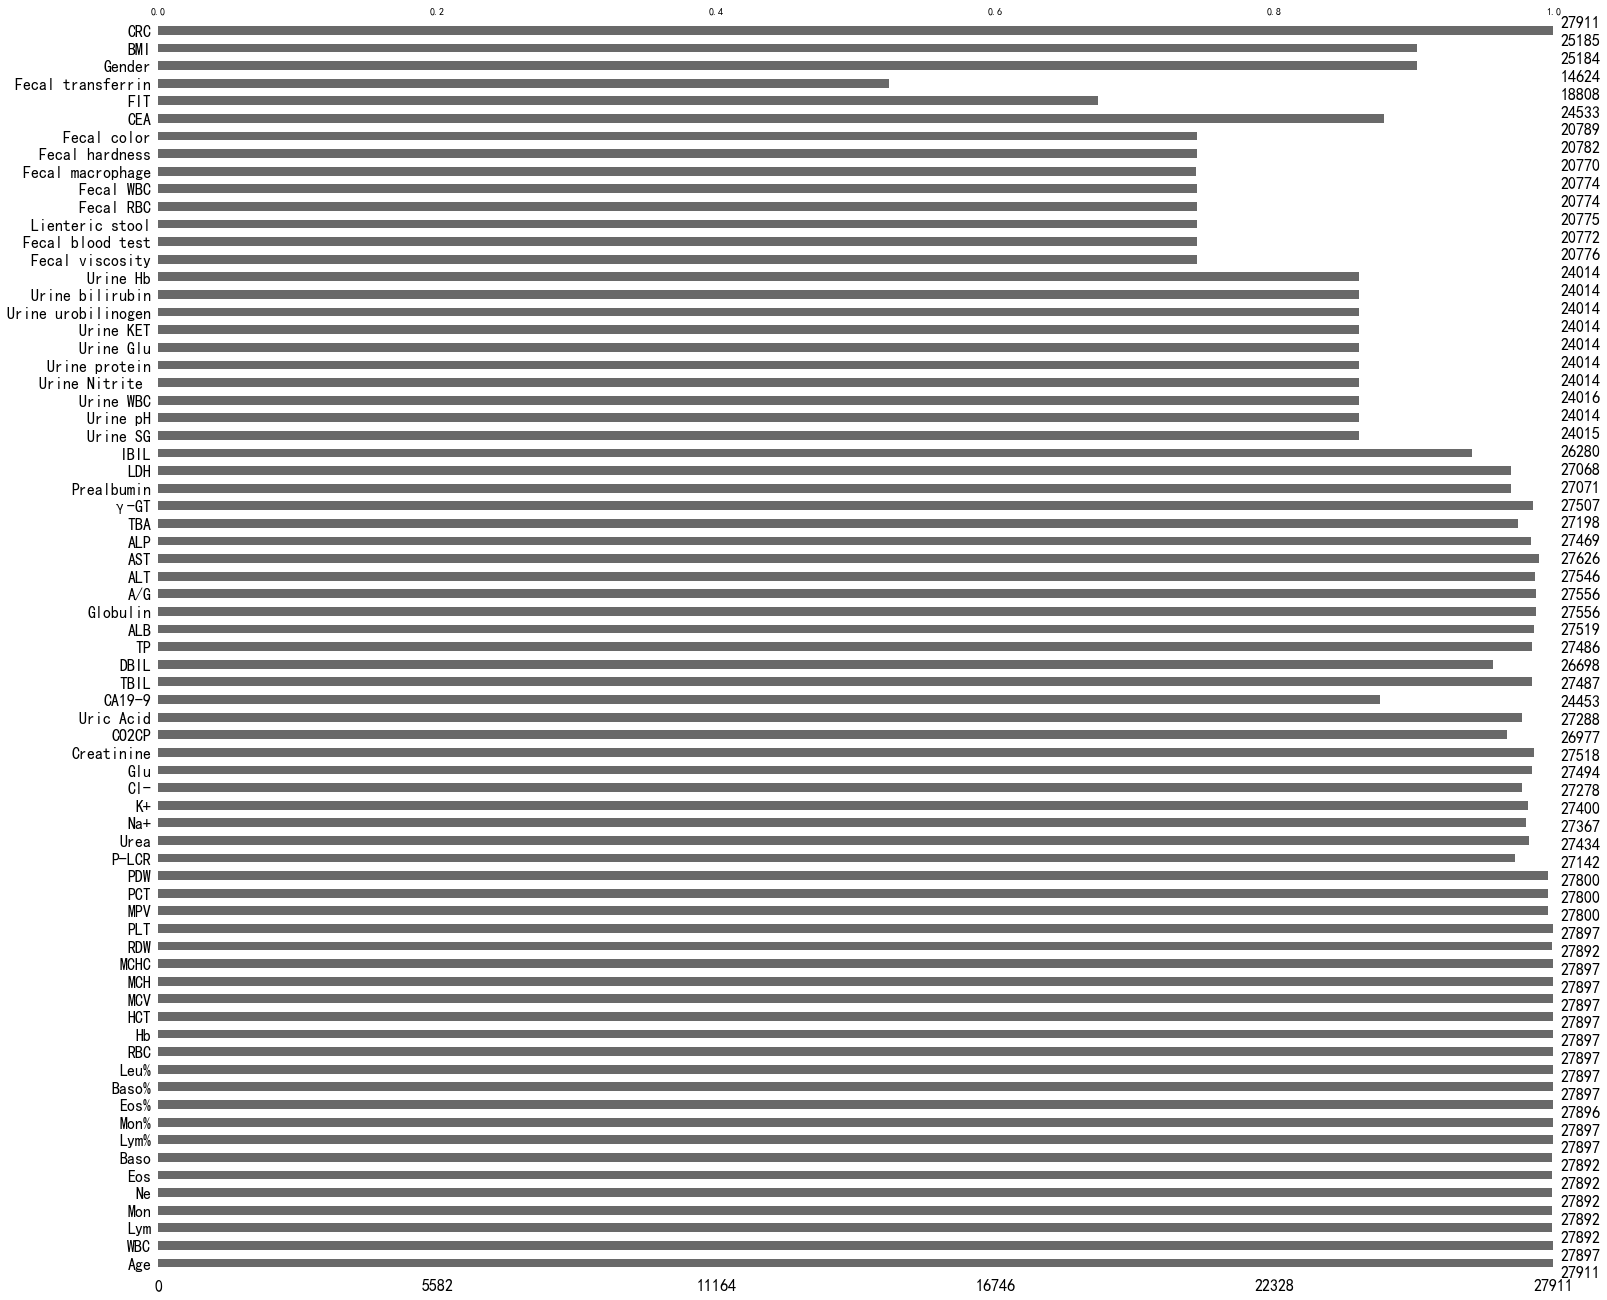

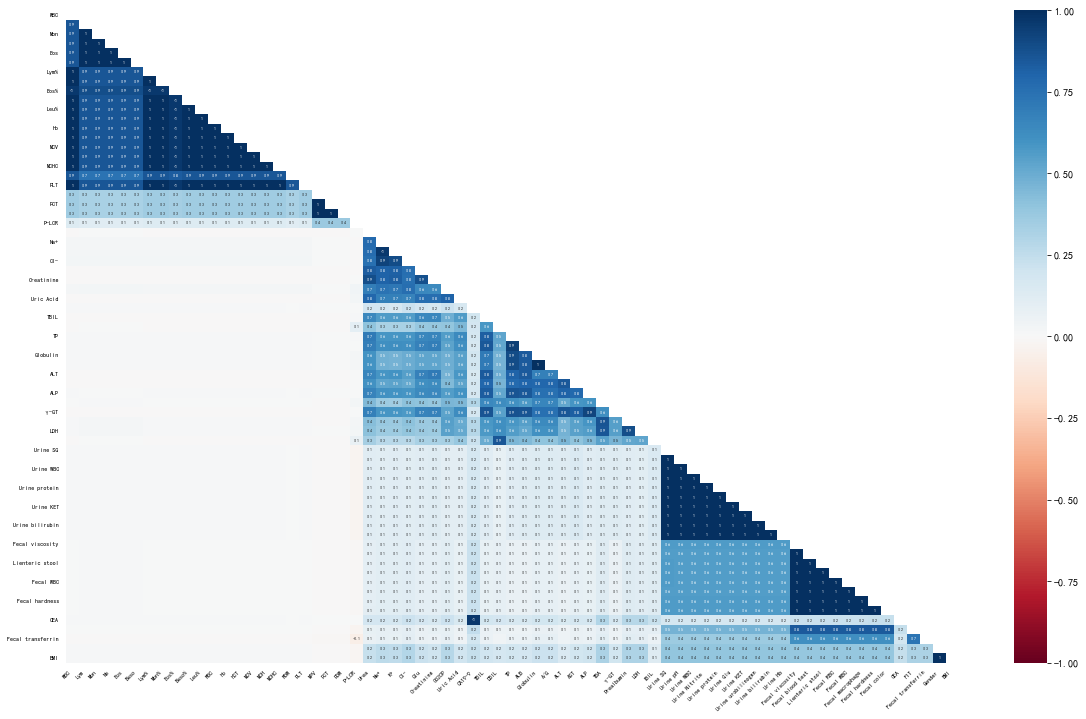

In [7]:
import missingno as msno
from pylab import mpl
# 设置显示中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False



msno.bar(df)
m=msno.heatmap(df,fontsize=6)
m

<AxesSubplot:>

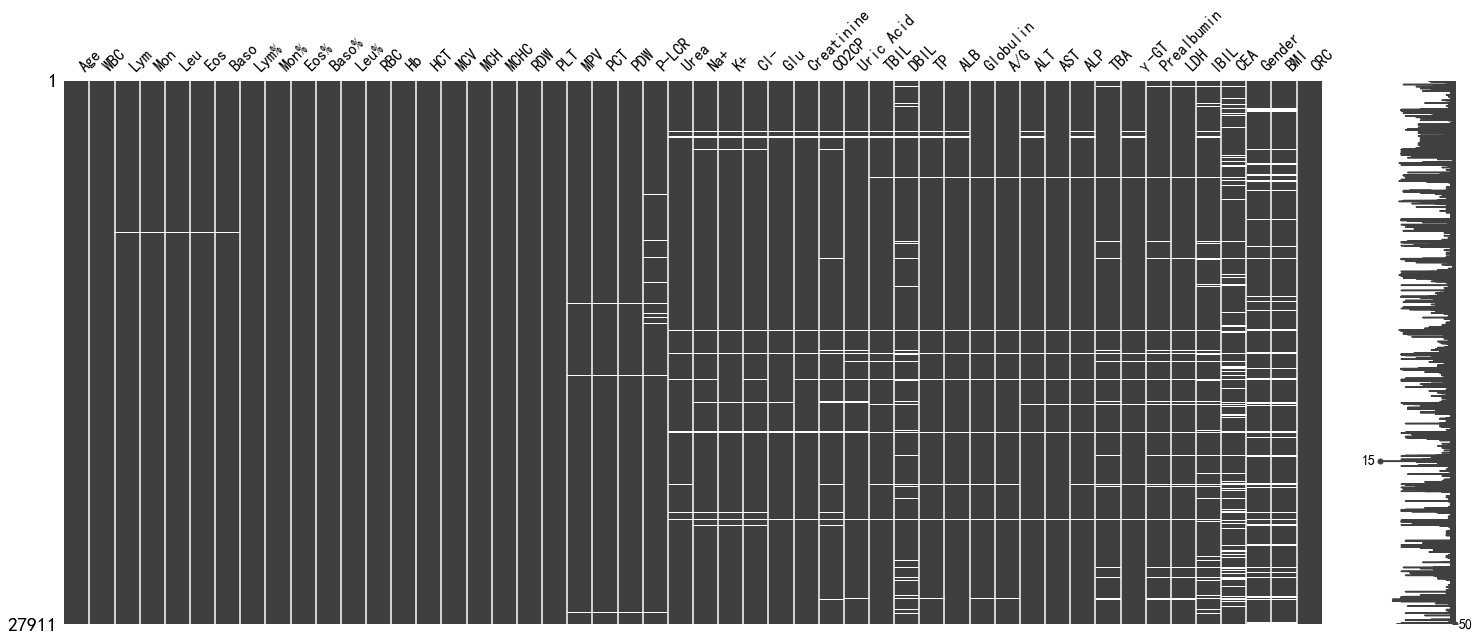

In [60]:
msno.matrix(df,filter="top",n=50)

In [55]:
df

,Age,WBC,Lym,Mon,Leu,Eos,Baso,Lym%,Mon%,Eos%,Baso%,Leu%,RBC,Hb,HCT,MCV,MCH,MCHC,RDW,PLT,MPV,PCT,PDW,P-LCR,Urea,Na+,K+,Cl-,Glu,Creatinine,CO2CP,Uric Acid,CA19-9,TBIL,DBIL,TP,ALB,Globulin,A/G,ALT,AST,ALP,TBA,γ-GT,Prealbumin,LDH,IBIL,Urine SG,Urine pH,Urine WBC,Urine Nitrite,Urine protein,Urine Glu,Urine KET,Urine urobilinogen,Urine bilirubin,Urine Hb,Fecal viscosity,Fecal blood test,Lienteric stool,Fecal RBC,Fecal WBC,Fecal macrophage,Fecal hardness,Fecal color,CEA,FIT,Fecal transferrin,Gender,BMI,CRC
0,61,4.16,1.09,0.52,2.53,0.00,0.02,26.2,12.5,0.0,0.5,60.8,5.08,173,48.40,95.3,34.1,357.0,13.6,99,9.50,0.09,10.70,21.9,4.1,141,4.5,101,5.6,86,27,0.36,NaN,5.3,2.4,69,39,30.0,1.30,44,41,80,5.1,51,147,249,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.222222,0
1,73,3.63,0.75,0.17,2.67,0.04,0.00,20.7,4.7,1.1,0.0,73.5,4.81,149,43.50,90.4,31.0,343.0,12.9,101,10.4,0.11,12.40,28.0,4.0,142,4.0,106,4.0,56,26,0.26,NaN,19.4,6.9,72,47,25.0,1.88,16,22,68,6.5,38,192,152,12.5,1.005,8.0,阴性,阴性,阴性,正常,阴性,正常,阴性,阴性,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,25.826446,0
2,84,3.65,1.33,0.22,1.98,0.10,0.02,36.4,6.0,2.7,0.5,54.4,3.68,122,35.20,95.7,33.2,347.0,12.8,167,9.20,0.15,9.50,17.6,3.9,136,4.2,97,6.3,80,25,0.21,27.91,5.3,1.6,70,43,27.0,1.59,6,17,109,2.2,26,210,126,3.7,1.008,6.0,阴性,阴性,阴性,正常,阴性,正常,阴性,阴性,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.69,NaN,NaN,0.0,19.531250,0
3,71,7.29,1.79,0.30,5.08,0.12,0.00,24.6,4.1,1.6,0.0,69.7,3.84,125,37.20,96.9,32.6,336.0,12.4,187,9.6,0.18,10.40,21.6,8.3,146,4.1,105,5.6,85,26,0.27,NaN,7.3,2.2,74,45,29.0,1.55,14,16,38,10.1,11,NaN,146,5.1,1.010,6.0,阴性,阴性,阴性,正常,阴性,正常,阴性,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,80,5.68,1.81,0.37,3.36,0.12,0.02,31.9,6.5,2.1,0.4,59.1,3.06,99,27.90,91.2,32.4,355.0,11.6,175,9.20,0.16,9.10,17.7,4.9,132,3.8,100,9.7,66,26,0.38,< 2.00,7.7,2.3,63,37,26.0,1.42,11,18,66,2.3,18,199,143,5.4,1.010,5.0,100.0,阳性,0.25,正常,阴性,正常,阴性,10.0,-,-,-,-,-,-,软,黄色,3.63,NaN,NaN,0.0,29.968783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27906,56,4.58,1.45,0.38,2.49,0.23,0.03,31.7,8.3,5.0,0.7,54.3,4.41,147,43.10,97.7,33.3,341.0,12.5,219,10.00,0.22,11.00,23.8,5.0,142,4.1,105,5.4,69,NaN,0.31,NaN,12.6,2.2,71,48,23.0,2.09,32,20,80,3.4,42,NaN,182,10.4,1.013,7.5,阴性,阴性,阴性,正常,阴性,正常,阴性,阴性,-,-,-,-,-,-,软,黄色,NaN,阴性,阴性,1.0,21.671258,0
27907,39,4.21,1.28,0.34,2.49,0.08,0.02,30.4,8.1,1.9,0.5,59.1,4.85,156,45.10,93.0,32.2,346.0,11.6,178,10.30,0.18,11.20,27.5,5.8,137,4.2,100,6.0,90,26,0.44,< 2.00,31.8,4.0,74,51,23.0,2.22,20,20,75,1.0,38,325,160,27.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.68,NaN,NaN,NaN,NaN,0
27908,56,5.88,2.60,0.52,2.58,0.14,0.04,44.2,8.8,2.4,0.7,43.9,4.12,129,40.00,97.1,31.3,323.0,13.5,251,10.50,0.26,11.90,28.8,4.7,144,3.9,108,5.3,61,25,0.25,NaN,17.9,2.9,70,44,26.0,1.69,26,18,88,1.2,19,245,151,15.0,1.022,6.0,阴性,阴性,阴性,正常,阴性,正常,阴性,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
27909,77,10.04,1.92,0.63,7.39,0.07,0.03,19.1,6.3,0.7,0.3,73.6,3.86,112,0.34,87.3,29.0,332.0,15.5,193,10.90,0.21,12.40,30.8,6.5,145,3.5,102,6.6,81,26,434,17.49,7.4,2.8,62,34,28.0,1.21,11,15,155,3.4,21,206,236,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.86,NaN,NaN,NaN,NaN,1
